In [175]:
from dotenv import load_dotenv
import os
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr

import warnings
warnings.filterwarnings('ignore')

load_dotenv()

True

In [165]:
# DB connection parameters
hostname = os.environ.get('host'),
database = os.environ.get('database')
user = os.environ.get('user')
password = os.environ.get('password')
sslmode = 'disable'



In [166]:
# Create connection and cursor
conn_string = "host={} dbname={} user={} password={} sslmode={}".format(hostname[0],
                                                                        database,
                                                                        user,
                                                                        password,
                                                                        sslmode)
conn = pg.connect(conn_string)

sql = """
SELECT *
FROM dev_trend_data
"""


df = pd.read_sql_query(sql, conn, parse_dates=['date'], )
conn.close()

df.head()

,date,city,state,country_code,zip,units,album,song,artist,song_isrc,album_upc,release_type,transaction_type,provider
0,2020-07-06,Anchorage,AK,United States,99507,1,Levante,Levante,Carbon Citizens,TCAEX2086952,'859739854381',Single,Song,itunes
1,2020-07-06,Ogden,UT,United States,84414,1,Gatti,Gatti,Carbon Citizens,TCAEX2087822,'859739858860',Single,Song,itunes
2,2020-07-08,Ogden,UT,United States,84414,1,S.R.T.,S.R.T.,Carbon Citizens,TCAEX2086871,'859739853995',Single,Song,itunes
3,2020-07-08,Hull,MA,United States,02045,1,Gatti,Gatti,Carbon Citizens,TCAEX2087822,'859739858860',Single,Song,itunes
4,2020-07-09,Ogden,UT,United States,84414,1,R8,R8,Carbon Citizens,TCAEX2086903,'859739854190',Single,Song,itunes


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              48407 non-null  datetime64[ns]
 1   city              48407 non-null  object        
 2   state             48407 non-null  object        
 3   country_code      48407 non-null  object        
 4   zip               48407 non-null  object        
 5   units             48407 non-null  int64         
 6   album             48407 non-null  object        
 7   song              48407 non-null  object        
 8   artist            48407 non-null  object        
 9   song_isrc         48407 non-null  object        
 10  album_upc         48407 non-null  object        
 11  release_type      48407 non-null  object        
 12  transaction_type  48407 non-null  object        
 13  provider          48407 non-null  object        
dtypes: datetime64[ns](1), 

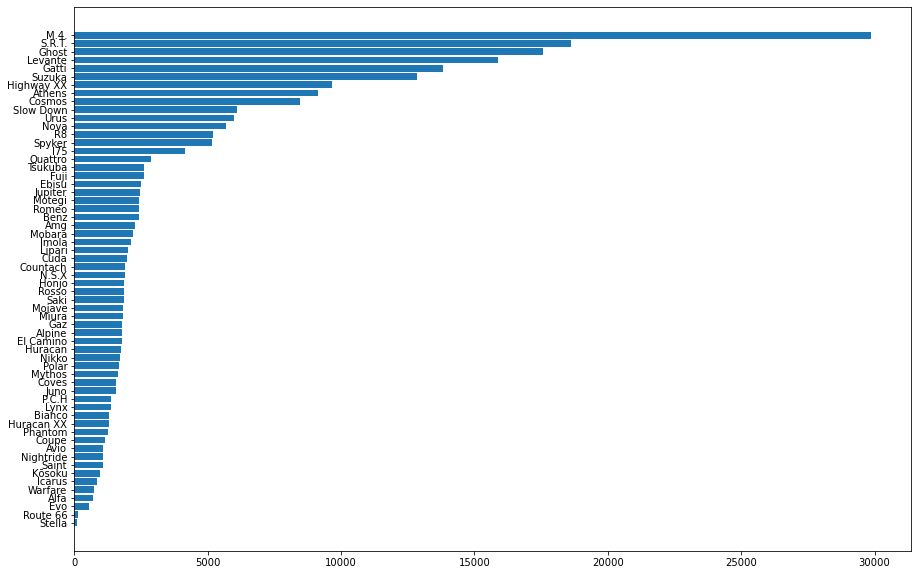

In [168]:
play_counts = df.groupby('song')['units'].sum().reset_index().sort_values('units')


plt.figure(figsize=(15,10))
plt.barh(data = play_counts,
         y = 'song',
        width = play_counts['units']);

In [169]:
song_date = df.groupby(['date','song']).sum().reset_index()
song_date = song_date.pivot(index = 'date', columns= 'song', values='units').copy()
song_date.head()

song,Alfa,Alpine,Amg,Athens,Avio,Benz,Bianco,Cosmos,Countach,Coupe,...,S.R.T.,Saint,Saki,Slow Down,Spyker,Stella,Suzuka,Tsukuba,Urus,Warfare
date,,,,,,,,,,,,,,,,,,,,,
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.0,NaN,NaN,57.0,NaN,NaN,NaN,NaN,63.0,NaN
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,37.0,NaN
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0,NaN,NaN,52.0,NaN,NaN,NaN,NaN,52.0,NaN
2020-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN,53.0,NaN
2020-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,48.0,NaN


In [170]:
song_date_culm = song_date.expanding(1).sum()

In [176]:
bcr.bar_chart_race(df = song_date_culm,
                   n_bars=10,
                   dpi=144,
                   filename='cc_top10_over_time.mp4',
                  steps_per_period=20,
                  period_length=200)